<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Principal Component Analysis (PCA) Reference Code

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Using sklearn

In [2]:
# load pca, standard scaler and dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

In [3]:
# load data and instantiate scaler
data = load_diabetes()
scaler = StandardScaler()

In [4]:
# standardize the data
X = pd.DataFrame(scaler.fit_transform(data.data), columns=data.feature_names)

In [5]:
# instantiate PCA with n_components
pca = PCA(n_components=5)

In [6]:
# project on the principal components and insert results into a dataframe
cols = ['PC_{}'.format(i) for i in range(1, pca.n_components+1)]
X_pca = pd.DataFrame(pca.fit_transform(X), columns=cols)
X_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
0,0.587208,-1.946828,0.589233,-0.082812,-0.256630
1,-2.831612,1.372085,0.027915,-0.469999,-0.143229
2,0.272148,-1.634898,0.739270,-0.791475,-1.163821
3,0.049310,0.382253,-2.013037,1.373239,0.255528
4,-0.756451,0.811968,-0.057259,-0.137520,-0.133344


In [7]:
# Get the most important pieces of information
print("Number of principal components:\t\t", pca.n_components_)
print("Explained variance:\t\t\t", np.round(pca.explained_variance_, 3))
print("Explained variance ratio:\t\t", np.round(
    pca.explained_variance_ratio_, 3))
print("Cumulative explained variance ratio:\t", np.round(
    np.cumsum(pca.explained_variance_ratio_), 3))

Number of principal components:		 5
Explained variance:			 [4.033 1.496 1.209 0.958 0.664]
Explained variance ratio:		 [0.402 0.149 0.121 0.096 0.066]
Cumulative explained variance ratio:	 [0.402 0.552 0.672 0.768 0.834]


In [8]:
# eigenvectors of the covariance matrix of the data
# here each row is an eigenvector
pca.components_

array([[ 0.21643101,  0.18696711,  0.3031625 ,  0.2717397 ,  0.34325493,
         0.35186062, -0.28243639,  0.42883325,  0.37861731,  0.32218282],
       [ 0.04437151, -0.38654811, -0.15628061, -0.13825564,  0.57302669,
         0.45593985,  0.50624287, -0.06818423, -0.0261893 , -0.0849466 ],
       [ 0.49466811, -0.10685833,  0.1675317 ,  0.51356804, -0.0685867 ,
        -0.26969438,  0.38602787, -0.38068121,  0.0636315 ,  0.27684271],
       [-0.4140095 , -0.67986052,  0.49982533, -0.01966734, -0.06839533,
        -0.16777384, -0.07602005,  0.0079212 ,  0.26442742,  0.08708624],
       [-0.68686389,  0.37345612,  0.12935936,  0.48689014,  0.12917415,
         0.11673143,  0.24499115, -0.14364377, -0.1516611 ,  0.03138792]])

In [9]:
# this gives us the eigenvectors as column vectors
pca.components_.T

array([[ 0.21643101,  0.04437151,  0.49466811, -0.4140095 , -0.68686389],
       [ 0.18696711, -0.38654811, -0.10685833, -0.67986052,  0.37345612],
       [ 0.3031625 , -0.15628061,  0.1675317 ,  0.49982533,  0.12935936],
       [ 0.2717397 , -0.13825564,  0.51356804, -0.01966734,  0.48689014],
       [ 0.34325493,  0.57302669, -0.0685867 , -0.06839533,  0.12917415],
       [ 0.35186062,  0.45593985, -0.26969438, -0.16777384,  0.11673143],
       [-0.28243639,  0.50624287,  0.38602787, -0.07602005,  0.24499115],
       [ 0.42883325, -0.06818423, -0.38068121,  0.0079212 , -0.14364377],
       [ 0.37861731, -0.0261893 ,  0.0636315 ,  0.26442742, -0.1516611 ],
       [ 0.32218282, -0.0849466 ,  0.27684271,  0.08708624,  0.03138792]])

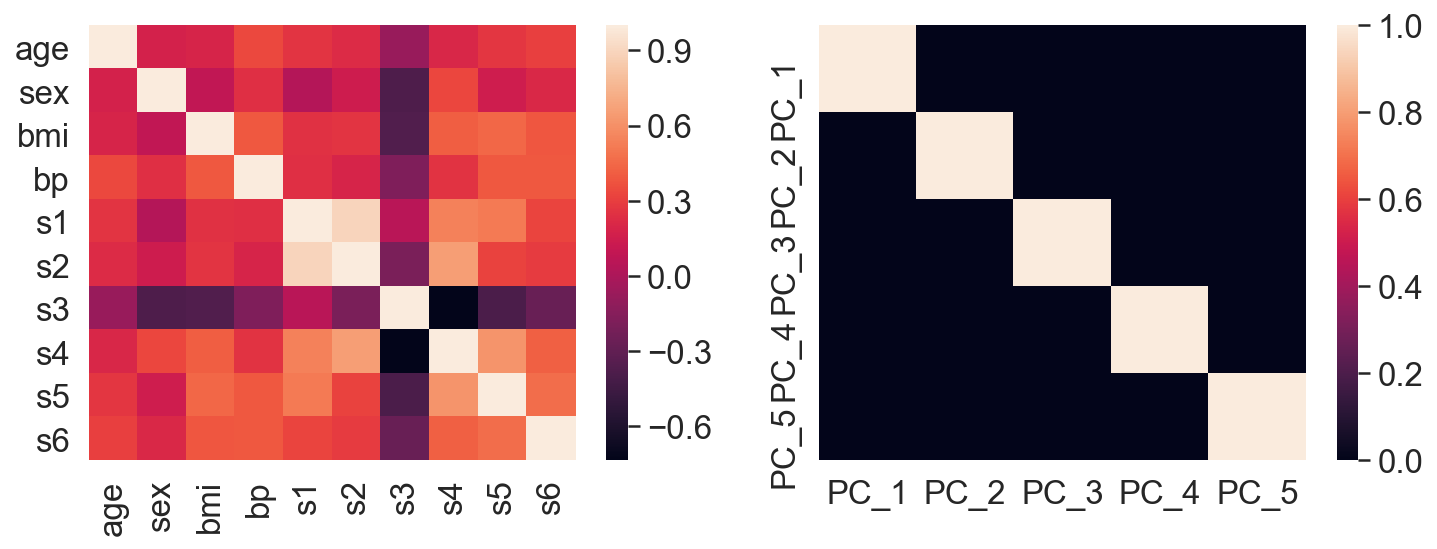

In [10]:
# compare correlations before and after tranformation
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
sns.heatmap(X.corr(), ax=ax[0])
ax[0].set_ylim([X.shape[1], 0])
sns.heatmap(X_pca.corr(), ax=ax[1])
ax[1].set_ylim([pca.n_components_, 0])
plt.show()

## By hand

In [11]:
# get the eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(X.cov())

In [12]:
# sorted list of all eigenvalues
np.round(np.sort(eigen_values)[::-1], 3)

array([4.033, 1.496, 1.209, 0.958, 0.664, 0.604, 0.538, 0.435, 0.078,
       0.009])

In [13]:
# Sort the pairs of eigenvalues and eigenvectors according to eigenvalues

value_vector_pairs = [[eigen_values[i], eigen_vectors[:, i]]
                      for i in range(len(eigen_values))]
value_vector_pairs.sort(reverse=True)


def projection_matrix(value_vector_pairs, d):
    ''' 
        Extract the eigenvectors and insert them as column vectors
        into a new matrix
    '''
    projection_matrix = np.hstack([value_vector_pairs[i][1].reshape(
        len(value_vector_pairs), 1)
        for i in range(d)])
    return projection_matrix

In [14]:
# transform the data
X.dot(projection_matrix(value_vector_pairs, 5)).head(10)

,0,1,2,3,4
0,-0.587208,-1.946828,0.589233,-0.082812,-0.256630
1,2.831612,1.372085,0.027915,-0.469999,-0.143229
2,-0.272148,-1.634898,0.739270,-0.791475,-1.163821
3,-0.049310,0.382253,-2.013037,1.373239,0.255528
4,0.756451,0.811968,-0.057259,-0.137520,-0.133344
5,3.966355,-0.381059,-0.337383,0.920145,0.807464
6,1.993787,-0.805538,-0.712199,-1.100239,0.891334
7,-2.075867,1.827921,0.524924,-2.066161,0.851715
8,-0.603033,-0.881253,-0.076720,-0.441303,-0.554411
9,0.212153,-0.492904,-0.814363,2.210554,-0.025046


Note the sign difference in the first column compared to the sklearn result. Keep in mind that the sign choice for the eigenvector and hence the direction of the principal component direction is up to you. 

In [15]:
# sklearn eigenvectors as column vectors in the below matrix
pca.components_.T

array([[ 0.21643101,  0.04437151,  0.49466811, -0.4140095 , -0.68686389],
       [ 0.18696711, -0.38654811, -0.10685833, -0.67986052,  0.37345612],
       [ 0.3031625 , -0.15628061,  0.1675317 ,  0.49982533,  0.12935936],
       [ 0.2717397 , -0.13825564,  0.51356804, -0.01966734,  0.48689014],
       [ 0.34325493,  0.57302669, -0.0685867 , -0.06839533,  0.12917415],
       [ 0.35186062,  0.45593985, -0.26969438, -0.16777384,  0.11673143],
       [-0.28243639,  0.50624287,  0.38602787, -0.07602005,  0.24499115],
       [ 0.42883325, -0.06818423, -0.38068121,  0.0079212 , -0.14364377],
       [ 0.37861731, -0.0261893 ,  0.0636315 ,  0.26442742, -0.1516611 ],
       [ 0.32218282, -0.0849466 ,  0.27684271,  0.08708624,  0.03138792]])

In [16]:
# manually obtained eigenvectors as column vectors in the below matrix
projection_matrix(value_vector_pairs, 5)

array([[-0.21643101,  0.04437151,  0.49466811, -0.4140095 , -0.68686389],
       [-0.18696711, -0.38654811, -0.10685833, -0.67986052,  0.37345612],
       [-0.3031625 , -0.15628061,  0.1675317 ,  0.49982533,  0.12935936],
       [-0.2717397 , -0.13825564,  0.51356804, -0.01966734,  0.48689014],
       [-0.34325493,  0.57302669, -0.0685867 , -0.06839533,  0.12917415],
       [-0.35186062,  0.45593985, -0.26969438, -0.16777384,  0.11673143],
       [ 0.28243639,  0.50624287,  0.38602787, -0.07602005,  0.24499115],
       [-0.42883325, -0.06818423, -0.38068121,  0.0079212 , -0.14364377],
       [-0.37861731, -0.0261893 ,  0.0636315 ,  0.26442742, -0.1516611 ],
       [-0.32218282, -0.0849466 ,  0.27684271,  0.08708624,  0.03138792]])

In [17]:
np.allclose(np.abs(pca.components_.T), 
            np.abs(projection_matrix(value_vector_pairs, 5)))

True